# Analyze behavior of parties / members with preprocessed text for all protocols


**Aim of notebook:**

Plot activities of different party members


Steiglechner & Birk, 04.02.2022

In [1]:
# Packages
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tueplots

os.chdir('..')

from src.read_data_and_output import load_json, save_json
from src.definitions import PARTIES, BEHAVIOURS
from src.preprocess_text import *
from src.analyze_behaviour import *

In [2]:
# Load all preprocessed plenarprotokoll-texts from the 19th legislative period
pt_preprocessed_json = load_json('pt_preprocessed.json')

# Create behaviour dataframe & analyze on frequency of positive and negative behaviour for each party

In [22]:
def remove_whitespace(x):
        return x.lstrip()

def remove_abg(x):
    return re.sub(r'(Abg\S*) *(.*$)',r'\2',x)


def get_top_5_actors(df: pd.DataFrame, party: str) -> pd.DataFrame:
    """Get top 5 members by activity + rest summed

    Args:
        df (pd.DataFrame): party df
        party (str): party

    Returns:
        pd.DataFrame: value count df
    """
    df_actors = df['Actor'].value_counts()
    top_5 = df_actors[:5]
    rest = df_actors[5:]
    # Sum up all except of top 5
    rest_sum = rest.values.sum()
    column = ['Party','Top 5 members','Top 5 frequency','Rest frequency']
    data = [party,top_5.index.to_list(),top_5.values,rest_sum]
    df_party_top5 = pd.DataFrame(data=[data],columns=column)
    # print(df_party_top5)
    # print(type(top_5.index.to_list()))
    return df_party_top5
    
    

In [23]:
i = 0
columns = ["Behaviour ID","Protocol ID", "Activity ID","Speaker","Party","Actor","Behaviour","Content"]
df_behaviour_all = pd.DataFrame(columns=columns)
# Create one df with behavirous
for key in pt_preprocessed_json.keys():
    # Get one temp protocol
    pt_temp = pt_preprocessed_json[key]
    # Create behaviour df temp
    df_behaviour_temp = create_df_behaviour(pt_temp,PARTIES,BEHAVIOURS)
    df_behaviour_all = df_behaviour_all.append(df_behaviour_temp)
    if i == 5:
        break
    i += 1

In [24]:
# sort out all single member activites
df_actors_all = df_behaviour_all[(df_behaviour_all["Actor"] != 'all') & (df_behaviour_all["Actor"] != 'abgeordneten')]
df_actors_all['Actor'] = df_actors_all['Actor'].apply(remove_whitespace)
df_actors_all['Actor'] = df_actors_all['Actor'].apply(remove_abg)
# Get activity ranking for each party
column = ['Party','Top 5 members','Top 5 frequency','Rest frequency']
df_parties_top5_actors = pd.DataFrame(columns=column)
for party in PARTIES:
    print(party)
    df_party = df_actors_all[df_actors_all['Party'] == party]
    df_party_actors = get_top_5_actors(df_party,party)
    # append all party top5 to one df
    df_parties_top5_actors = df_parties_top5_actors.append(df_party_actors)

CDU/CSU
SPD
DIE LINKE
BÜNDNIS 90/DIE GRÜNEN
AfD
FDP
fraktionslos


C:\Users\fbirk\AppData\Local\Temp/ipykernel_15096/1954553367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_actors_all['Actor'] = df_actors_all['Actor'].apply(remove_whitespace)
C:\Users\fbirk\AppData\Local\Temp/ipykernel_15096/1954553367.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_actors_all['Actor'] = df_actors_all['Actor'].apply(remove_abg)


In [64]:
# df_parties_top5_actors, 'fraktionslos' not included
top1 = []
top2 = []
top3 = []
top4 = []
top5 = []
rest_actors = []
for num in range(6):
    # print(df_parties_top5_actors['Top 5 frequency'].values[num])
    top1.append(df_parties_top5_actors['Top 5 frequency'].values[num][0])
    top2.append(df_parties_top5_actors['Top 5 frequency'].values[num][1])
    top3.append(df_parties_top5_actors['Top 5 frequency'].values[num][2])
    top4.append(df_parties_top5_actors['Top 5 frequency'].values[num][3])
    top5.append(df_parties_top5_actors['Top 5 frequency'].values[num][4])
    rest_actors.append(df_parties_top5_actors['Rest frequency'].values[num])
    # Rest frequency

[15 13 11  9  9]
[54 30 29 28 21]
[25 21 20 17 16]
[51 33 23 20 18]
[66 40 36 28 20]
[21 16 13 12 12]


In [50]:
df_parties_top5_actors['Rest frequency'].values[0]

149

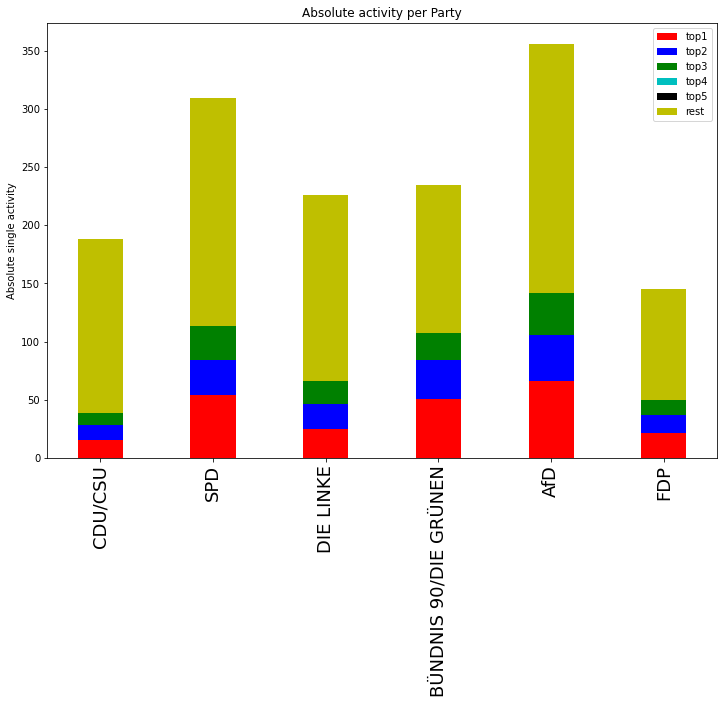

In [67]:
# dataset to numpy
dataset1 = np.array(top1)
dataset2 = np.array(top2)
dataset3 = np.array(top3)
dataset4 = np.array(top4)
dataset5 = np.array(top5)
dataset_rest = np.array(rest_actors)
# plot
fig, axs = plt.subplots(1,1,figsize=(12,8))
ind = np.arange(6)
width = 0.4
# print(ind, dataset1)
p1 = plt.bar(ind, dataset1, width, color='r')
p2 = plt.bar(ind, dataset2, width, bottom=dataset1, color='b')
p3 = plt.bar(ind, dataset3, width, bottom=dataset1+dataset2, color='g')
p4 = plt.bar(ind, dataset4, width, bottom=dataset1+dataset2+dataset3, color='c')
p5 = plt.bar(ind, dataset5, width, bottom=dataset1+dataset2+dataset3, color='k')
prest = plt.bar(ind, dataset_rest, width, bottom=dataset1+dataset2+dataset3, color='y')
plt.title("Absolute activity per Party")
plt.ylabel("Absolute single activity")
x_ticks_labels = PARTIES[:-1]
plt.xticks(ticks=ind,labels=x_ticks_labels, rotation='vertical', fontsize=18)
legend_label = ['top1','top2','top3','top4','top5','rest',]
plt.legend(legend_label)

In [66]:
df_parties_top5_actors

Party                                      Top 5 members  \
0                CDU/CSU  [Albert Rupprecht [CDU/CSU], Ralph Brinkhaus [...   
0                    SPD  [Carsten Schneider [Erfurt] [SPD], Marianne Sc...   
0              DIE LINKE  [Dr. Diether Dehm [DIE LINKE], Dr. Petra Sitte...   
0  BÜNDNIS 90/DIE GRÜNEN  [Britta Haßelmann [BÜNDNIS 90/DIE GRÜNEN], Ste...   
0                    AfD  [Stephan Brandner [AfD], Dr. Götz Frömming [Af...   
0                    FDP  [Alexander Graf Lambsdorff [FDP], Otto Fricke ...   
0           fraktionslos  [Dr. Frauke Petry [fraktionslos], Mario Mieruc...   

        Top 5 frequency Rest frequency  
0    [15, 13, 11, 9, 9]            149  
0  [54, 30, 29, 28, 21]            196  
0  [25, 21, 20, 17, 16]            160  
0  [51, 33, 23, 20, 18]            128  
0  [66, 40, 36, 28, 20]            214  
0  [21, 16, 13, 12, 12]             95  
0          [2, 2, 1, 1]              0